In [1]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
import matplotlib.pyplot as plt
import time
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# List of subfolders
subfolders = ["beyza", "zeynep", "ezgi"]

# Set the path to the root directory
root_path = r"C:\Users\Beyza\Desktop\project"

images = []
labels = []

valid_extensions = {".jpg", ".jpeg", ".png"}

for subfolder in subfolders:
    subfolder_path = os.path.join(root_path, subfolder)

    for folder_name in os.listdir(subfolder_path):
        folder_path = os.path.join(subfolder_path, folder_name)
        if os.path.isdir(folder_path):
            for file_name in os.listdir(folder_path):
                if any(file_name.lower().endswith(ext) for ext in valid_extensions):
                    image_path = os.path.join(folder_path, file_name)
                    label = file_name.split('_')[2]
                    img = cv2.imread(image_path)
                    if img is None:
                        print(f"Failed to load image: {image_path}")
                    else:
                        img = cv2.resize(img, (64, 64))
                        images.append(img)
                        labels.append(label)

In [3]:
images = np.array(images)
labels = np.array(labels)

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

images = images / 255.0

In [4]:
X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)

In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Adding dropout for regularization
model.add(Dense(128, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

C:\Users\Beyza\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [6]:
# Define the optimizer with a custom learning rate (e.g., 0.001)
custom_learning_rate = 0.001
custom_optimizer = Adam(learning_rate=custom_learning_rate)

In [7]:
# Create an image data generator
datagen = ImageDataGenerator(rescale=1./255)

In [8]:
# Compile the model with the custom optimizer
model.compile(optimizer=custom_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Create a generator for training data
train_generator = datagen.flow(X_train, y_train, batch_size=32)

# Create a generator for validation data
validation_generator = datagen.flow(X_test, y_test, batch_size=32)

In [10]:
# Record the start time before compilation
start_time = time.time()

In [11]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
527/527 ━━━━━━━━━━━━━━━━━━━━ 58s 89ms/step - accuracy: 0.0103 - loss: 5.1665 - val_accuracy: 0.0140 - val_loss: 4.6113
Epoch 2/20
527/527 ━━━━━━━━━━━━━━━━━━━━ 46s 87ms/step - accuracy: 0.0136 - loss: 4.5902 - val_accuracy: 0.0152 - val_loss: 4.4790
Epoch 3/20
527/527 ━━━━━━━━━━━━━━━━━━━━ 45s 86ms/step - accuracy: 0.0148 - loss: 4.4978 - val_accuracy: 0.0216 - val_loss: 4.5585
Epoch 4/20
527/527 ━━━━━━━━━━━━━━━━━━━━ 44s 84ms/step - accuracy: 0.0324 - loss: 4.4117 - val_accuracy: 0.0513 - val_loss: 4.1430
Epoch 5/20
527/527 ━━━━━━━━━━━━━━━━━━━━ 47s 89ms/step - accuracy: 0.0551 - loss: 4.1152 - val_accuracy: 0.0656 - val_loss: 4.1083
Epoch 6/20
527/527 ━━━━━━━━━━━━━━━━━━━━ 46s 87ms/step - accuracy: 0.0890 - loss: 3.8362 - val_accuracy: 0.0753 - val_loss: 4.3571
Epoch 7/20
527/527 ━━━━━━━━━━━━━━━━━━━━ 46s 86ms/step - accuracy: 0.1227 - loss: 3.5972 - val_accuracy: 0.2172 - val_loss: 3.1149
Epoch 8/20
527/527 ━━━━━━━━━━━━━━━━━━━━ 46s 87ms/step - accuracy: 0.1760 - loss: 3.2517 - 

In [12]:
# Record the end time after compilation
end_time = time.time()

# Calculate and print the compilation time
compilation_time = end_time - start_time
print(f"Model compilation time: {compilation_time} seconds")

Model compilation time: 934.255021572113 seconds


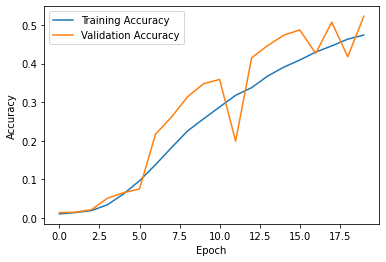

In [13]:
# Plot accuracy and validation accuracy graphs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
# Define the CNN model with glorot_uniform initializer
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

In [15]:
# Define the optimizer with a custom learning rate (e.g., 0.001)
custom_learning_rate = 0.001
custom_optimizer = Adam(learning_rate=custom_learning_rate)

In [16]:
# Create an image data generator
datagen = ImageDataGenerator(rescale=1./255)

In [17]:
# Compile the model with the custom optimizer
model.compile(optimizer=custom_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
# Create a generator for training data
train_generator = datagen.flow(X_train, y_train, batch_size=32)

# Create a generator for validation data
validation_generator = datagen.flow(X_test, y_test, batch_size=32)

In [19]:
# Record the start time before compilation
start_time = time.time()

In [20]:
# Train the model
history_2 = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
527/527 ━━━━━━━━━━━━━━━━━━━━ 43s 73ms/step - accuracy: 0.0112 - loss: 5.0574 - val_accuracy: 0.0176 - val_loss: 4.4788
Epoch 2/20
527/527 ━━━━━━━━━━━━━━━━━━━━ 35s 66ms/step - accuracy: 0.0257 - loss: 4.4702 - val_accuracy: 0.0356 - val_loss: 4.4303
Epoch 3/20
527/527 ━━━━━━━━━━━━━━━━━━━━ 32s 60ms/step - accuracy: 0.0511 - loss: 4.2324 - val_accuracy: 0.0613 - val_loss: 4.3697
Epoch 4/20
527/527 ━━━━━━━━━━━━━━━━━━━━ 32s 61ms/step - accuracy: 0.0976 - loss: 3.9052 - val_accuracy: 0.0347 - val_loss: 5.8657
Epoch 5/20
527/527 ━━━━━━━━━━━━━━━━━━━━ 32s 61ms/step - accuracy: 0.1405 - loss: 3.6679 - val_accuracy: 0.1844 - val_loss: 3.3028
Epoch 6/20
527/527 ━━━━━━━━━━━━━━━━━━━━ 32s 60ms/step - accuracy: 0.2271 - loss: 3.0938 - val_accuracy: 0.2414 - val_loss: 3.1032
Epoch 7/20
527/527 ━━━━━━━━━━━━━━━━━━━━ 33s 62ms/step - accuracy: 0.2915 - loss: 2.8145 - val_accuracy: 0.2801 - val_loss: 2.8598
Epoch 8/20
527/527 ━━━━━━━━━━━━━━━━━━━━ 34s 64ms/step - accuracy: 0.3399 - loss: 2.5103 - 

In [21]:
# Record the end time after compilation
end_time = time.time()

# Calculate and print the compilation time
compilation_time = end_time - start_time
print(f"Model compilation time: {compilation_time} seconds")

Model compilation time: 692.3208224773407 seconds


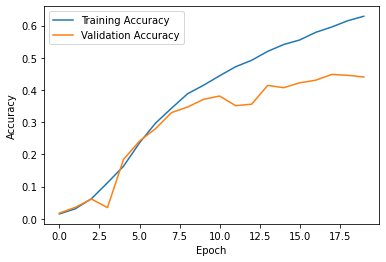

In [23]:
# Plot accuracy and validation accuracy graphs
plt.plot(history_2.history['accuracy'], label='Training Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))  # Added a new convolutional layer
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))  # Increased the number of units in the dense layer
model.add(Dropout(0.5))  # Added a dropout layer for regularization
model.add(Dense(len(label_encoder.classes_), activation='softmax'))


In [25]:
# Define the optimizer with a custom learning rate (e.g., 0.001)
custom_learning_rate = 0.001
custom_optimizer = Adam(learning_rate=custom_learning_rate)

In [26]:
# Create an image data generator
datagen = ImageDataGenerator(rescale=1./255)

In [27]:
# Compile the model with the custom optimizer
model.compile(optimizer=custom_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
# Create a generator for training data
train_generator = datagen.flow(X_train, y_train, batch_size=32)

# Create a generator for validation data
validation_generator = datagen.flow(X_test, y_test, batch_size=32)

In [29]:
# Record the start time before compilation
start_time = time.time()

In [30]:
# Train the model
history_2 = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
527/527 ━━━━━━━━━━━━━━━━━━━━ 53s 92ms/step - accuracy: 0.0073 - loss: 5.1849 - val_accuracy: 0.0131 - val_loss: 4.5549
Epoch 2/20
527/527 ━━━━━━━━━━━━━━━━━━━━ 39s 73ms/step - accuracy: 0.0145 - loss: 4.6495 - val_accuracy: 0.0157 - val_loss: 4.4788
Epoch 3/20
527/527 ━━━━━━━━━━━━━━━━━━━━ 37s 70ms/step - accuracy: 0.0170 - loss: 4.5430 - val_accuracy: 0.0297 - val_loss: 4.5785
Epoch 4/20
527/527 ━━━━━━━━━━━━━━━━━━━━ 35s 67ms/step - accuracy: 0.0275 - loss: 4.4875 - val_accuracy: 0.0618 - val_loss: 4.3674
Epoch 5/20
527/527 ━━━━━━━━━━━━━━━━━━━━ 37s 70ms/step - accuracy: 0.0419 - loss: 4.3348 - val_accuracy: 0.1000 - val_loss: 3.9976
Epoch 6/20
527/527 ━━━━━━━━━━━━━━━━━━━━ 37s 70ms/step - accuracy: 0.0738 - loss: 4.0661 - val_accuracy: 0.1407 - val_loss: 3.7520
Epoch 7/20
527/527 ━━━━━━━━━━━━━━━━━━━━ 37s 70ms/step - accuracy: 0.0946 - loss: 3.8766 - val_accuracy: 0.1682 - val_loss: 3.5645
Epoch 8/20
527/527 ━━━━━━━━━━━━━━━━━━━━ 38s 73ms/step - accuracy: 0.1179 - loss: 3.6761 - 

In [31]:
# Record the end time after compilation
end_time = time.time()

# Calculate and print the compilation time
compilation_time = end_time - start_time
print(f"Model compilation time: {compilation_time} seconds")

Model compilation time: 783.5583753585815 seconds


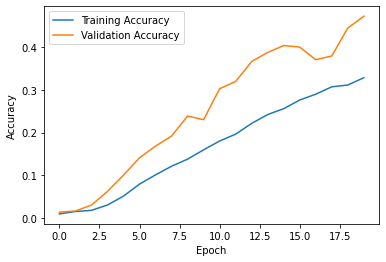

In [33]:
# Plot accuracy and validation accuracy graphs
plt.plot(history_2.history['accuracy'], label='Training Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()